In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Vania_game = pd.read_csv("Game 6-7.xlsx - Transylvania.csv")

In [5]:
Vania_game

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Transylvania,K,90.0,game,game,5.6603,220.6938,45,1031.8234,0,...,0,262,161,43,4,0,255,133,56,10
1,Transylvania,C,90.0,game,game,6.8490,104.5272,36,1213.9651,1,...,0,380,193,45,5,0,339,163,56,19
2,Transylvania,X,0.0,game,game,0.1311,0.0000,0,22.7642,0,...,0,0,0,0,0,0,0,0,0,0
3,Transylvania,V,90.0,game,game,6.1550,145.0160,38,1100.9492,0,...,0,348,152,43,14,0,316,156,40,20
4,Transylvania,P,90.0,game,game,5.3944,244.5465,42,964.0471,1,...,0,202,99,42,9,0,181,91,46,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Transylvania,Chiero,NaN,1st.half,game,1.6247,63.4163,15,266.8555,0,...,0,64,45,10,3,0,57,39,15,7
72,Transylvania,Nielsen,NaN,1st.half,game,2.9916,56.5626,11,513.0136,1,...,0,168,87,28,6,0,153,86,31,4
73,Transylvania,Flynn,NaN,1st.half,game,1.5396,87.5829,22,262.3282,0,...,0,60,41,13,3,0,64,32,13,5
74,Transylvania,Wood,NaN,1st.half,game,0.0084,0.0000,0,1.4070,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Vania_full = Vania_game[Vania_game['Split Name']== 'game']
Vania_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Transylvania,K,90.0,game,game,5.6603,220.6938,45,1031.8234,0,...,0,262,161,43,4,0,255,133,56,10
1,Transylvania,C,90.0,game,game,6.8490,104.5272,36,1213.9651,1,...,0,380,193,45,5,0,339,163,56,19
2,Transylvania,X,0.0,game,game,0.1311,0.0000,0,22.7642,0,...,0,0,0,0,0,0,0,0,0,0
3,Transylvania,V,90.0,game,game,6.1550,145.0160,38,1100.9492,0,...,0,348,152,43,14,0,316,156,40,20
4,Transylvania,P,90.0,game,game,5.3944,244.5465,42,964.0471,1,...,0,202,99,42,9,0,181,91,46,24
5,Transylvania,F,90.0,game,game,3.1278,0.0000,1,562.2076,1,...,0,140,48,12,6,0,118,35,19,9
6,Transylvania,B,17.0,game,game,1.4799,235.9289,12,260.7942,0,...,0,61,37,8,5,0,42,28,10,10
7,Transylvania,S,90.0,game,game,6.0658,295.9429,41,1125.9078,1,...,0,281,152,37,10,0,227,156,60,25
8,Transylvania,Z,0.0,game,game,0.1491,0.0000,0,20.2922,0,...,0,1,0,0,0,0,1,0,0,0
9,Transylvania,I,15.0,game,game,1.1645,113.5976,12,171.7111,0,...,0,48,32,9,1,0,44,24,6,9


In [7]:
Vania_volume_intensity = Vania_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [8]:
Vania_cluster = Vania_volume_intensity.loc[:, Vania_volume_intensity.columns != 'Player Name']

In [9]:
Vania_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Vania_cluster)
    Vania_distortions.append(kmeanModel.inertia_)

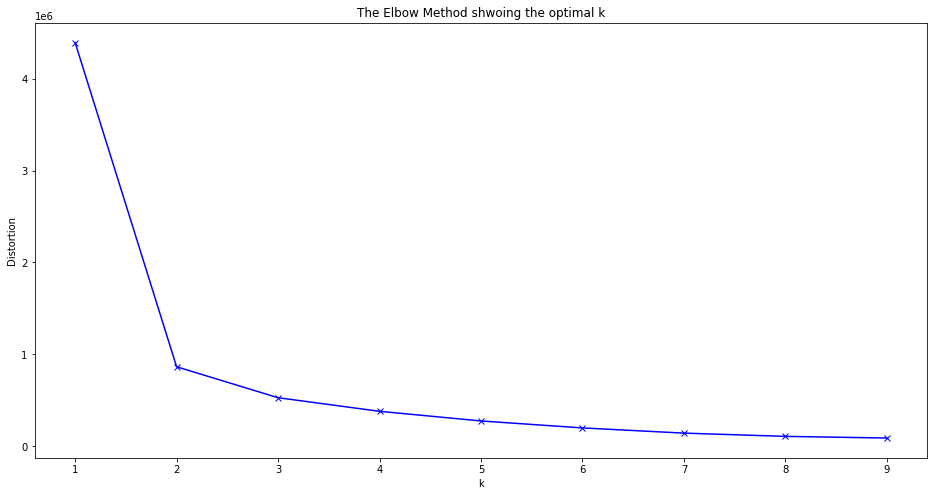

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, Vania_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [11]:
x_Vania = Vania_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Vania)
X_norm = pd.DataFrame(x_scaled)

In [12]:
pca_Vania = PCA(n_components = 2) # 2D PCA for the plot
reduced_Vania = pd.DataFrame(pca_Vania.fit_transform(X_norm))

In [13]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Vania)
# get the cluster labels
labels = kmeans.predict(reduced_Vania)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Vania_names = Vania_full['Player Name']

In [14]:
reduced_Vania['cluster'] = clusters
reduced_Vania['names'] = Vania_names
reduced_Vania.columns = ['x', 'y', 'cluster', 'names']
reduced_Vania.head()

,x,y,cluster,names
0,-0.755343,-0.738864,1,K
1,-1.393405,0.158032,1,C
2,1.559557,0.105244,2,X
3,-0.885297,-0.713570,1,V
4,-0.951118,0.188982,1,P


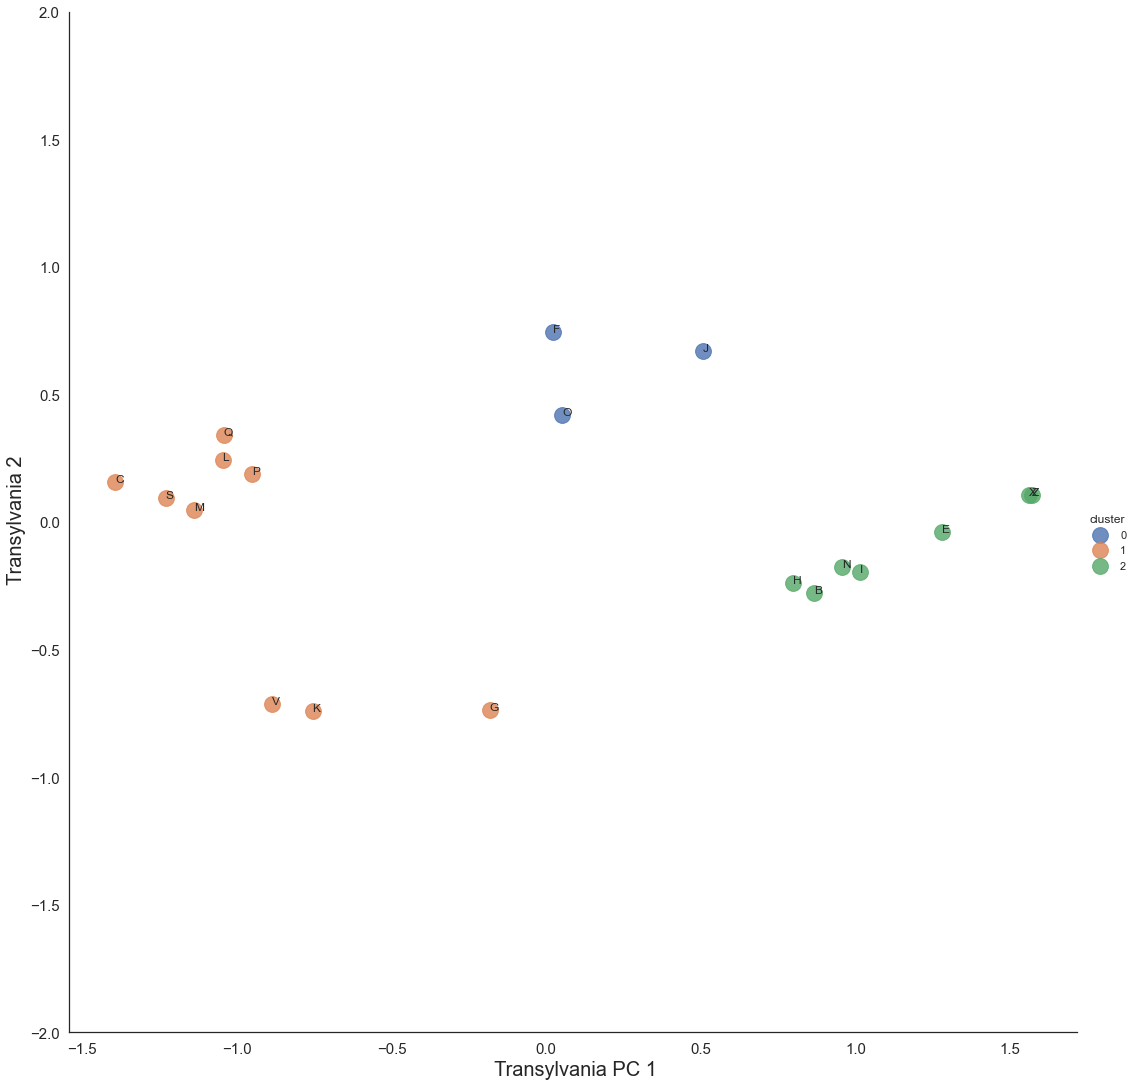

In [15]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Vania, legend= True,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced_Vania.x, reduced_Vania.y, reduced_Vania.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel(" Transylvania PC 1", fontsize = 20)
plt.ylabel(" Transylvania 2", fontsize = 20)
plt.show()

In [16]:
Vania_group_0 = reduced_Vania[(reduced_Vania['cluster'] == 0)]
Vania_group_0
# Positions: F(GK) J(F) O(F)

,x,y,cluster,names
5,0.022121,0.746510,0,F
10,0.506352,0.668458,0,J
11,0.052441,0.419257,0,O


In [17]:
Vania_group_1 = reduced_Vania[(reduced_Vania['cluster'] == 1)]
Vania_group_1
# Postions: K(D) C(MF) V(MF) P(F) S(MF) Q(MF) M(D) L(D) G(F)

,x,y,cluster,names
0,-0.755343,-0.738864,1,K
1,-1.393405,0.158032,1,C
3,-0.885297,-0.713570,1,V
4,-0.951118,0.188982,1,P
7,-1.229496,0.095212,1,S
12,-1.042681,0.341656,1,Q
13,-1.137870,0.045576,1,M
15,-1.046058,0.243292,1,L
16,-0.182447,-0.735294,1,G


In [18]:
Vania_group_2 = reduced_Vania[(reduced_Vania['cluster'] == 2)]
Vania_group_2
# Postions: X(GK) B(F) Z(F) I(F) H(F) E(MF) N(F)

,x,y,cluster,names
2,1.559557,0.105244,2,X
6,0.867160,-0.277402,2,B
8,1.568906,0.104477,2,Z
9,1.015365,-0.196530,2,I
14,0.796342,-0.238937,2,H
17,1.280136,-0.038686,2,E
18,0.955335,-0.177411,2,N
